# 시티랩스 모델데이터 만들기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from datetime import timedelta

## 주가, 시가총액: df_ct_pp

In [3]:
df_ct_pp = pd.read_csv('./data/시티랩스_시세추이_2016-2022.csv',encoding='cp949')
df_ct_pp
df_ct_pp['일자'] = pd.to_datetime(df_ct_pp['일자'])
df_ct_pp = df_ct_pp.sort_values(by='일자')
df_ct_pp

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
1554,2016-01-04,3020,20,0.67,3050,3135,3010,1283754,3952030070,47486277660,15723933
1553,2016-01-05,3020,0,0.00,2960,3030,2930,725642,2165452785,47486277660,15723933
1552,2016-01-06,2895,-125,-4.14,3000,3065,2840,954645,2798725660,45520786035,15723933
1551,2016-01-07,2945,50,1.73,2865,3100,2840,1726234,5158706170,46306982685,15723933
1550,2016-01-08,2920,-25,-0.85,2900,2940,2755,821785,2341933860,45913884360,15723933
...,...,...,...,...,...,...,...,...,...,...,...
4,2022-04-25,706,-4,-0.56,710,714,691,324973,227944056,74905560062,106098527
3,2022-04-26,738,32,4.53,701,790,701,1334270,991449167,78300712926,106098527
2,2022-04-27,768,30,4.07,738,774,710,727174,549961164,81483668736,106098527
1,2022-04-28,758,-10,-1.30,765,778,750,365316,278013392,80422683466,106098527


In [4]:
df_ct_pp = df_ct_pp.set_index('일자')
df_ct_pp1 = df_ct_pp.loc['2016-01':'2021-12']

In [5]:
df_ct_pp.reset_index(inplace=True)

In [6]:
df_ct_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      1555 non-null   datetime64[ns]
 1   종가      1555 non-null   int64         
 2   대비      1555 non-null   int64         
 3   등락률     1555 non-null   float64       
 4   시가      1555 non-null   int64         
 5   고가      1555 non-null   int64         
 6   저가      1555 non-null   int64         
 7   거래량     1555 non-null   int64         
 8   거래대금    1555 non-null   int64         
 9   시가총액    1555 non-null   int64         
 10  상장주식수   1555 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 133.8 KB


## 재무비율

In [14]:
df_ct_hts = pd.read_csv('./data/시티랩스_hts재무비율.csv',encoding='cp949',index_col=0).T
df_ct_hts = df_ct_hts.loc['2015/12':]
df_ct_hts

,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),...,지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),DPS(원),PER(배),PBR(배),발행주식수,배당수익률(%)
2015/12,"3,000",163,7,6,6,429,184,245,79,74.85,...,3.63,5.59,9.79,38,"1,623",0,19.95,1.85,"15,724",0.00
2016/03,"2,995",87,-3,-2,-2,442,201,241,79,83.63,...,-2.51,-2.00,-3.59,-14,"1,595",0,NaN,1.88,"15,724",0.00
2016/06,"2,320",67,-5,-11,-11,432,144,288,90,50.15,...,-16.32,-9.97,-16.49,-61,"1,605",0,NaN,1.45,"17,936",0.00
2016/09,"2,695",94,-3,4,4,451,164,287,90,57.12,...,4.02,3.41,5.24,21,"1,621",0,32.09,1.66,"17,936",0.00
2016/12,"2,735",128,2,-17,-17,452,174,279,90,62.26,...,-13.49,-15.27,-24.37,-96,"1,555",0,NaN,1.76,"17,936",0.00
2017/03,"3,035",126,2,4,4,472,137,335,101,40.97,...,3.12,3.40,5.12,20,"1,663",0,38.89,1.82,"20,149",0.00
2017/06,"2,030",117,-4,-3,-3,498,165,333,101,49.53,...,-2.22,-2.21,-3.11,-13,"1,654",0,NaN,1.23,"20,149",0.00
2017/09,"1,440",126,-4,-3,-3,584,188,395,121,47.66,...,-2.50,-2.38,-3.46,-14,"1,638",0,NaN,0.88,"24,161",0.00
2017/12,"3,390",124,-25,-92,-91,546,242,304,121,79.54,...,-73.82,-64.79,-104.52,-379,"1,261",0,NaN,2.69,"24,161",0.00
2018/03,"3,900",64,-8,-8,-8,871,509,362,145,140.52,...,-12.21,-4.42,-9.40,-30,"1,250",0,NaN,3.12,"28,993",0.00


In [15]:
df_ct_hts.iloc[:,:12] # 유보율 제거필요

# 수치데이터 

,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),유보율(%),영업이익률(%)
2015/12,"3,000",163,7,6,6,429,184,245,79,74.85,224.56,4.23
2016/03,"2,995",87,-3,-2,-2,442,201,241,79,83.63,218.98,-3.57
2016/06,"2,320",67,-5,-11,-11,432,144,288,90,50.15,221.07,-7.67
2016/09,"2,695",94,-3,4,4,451,164,287,90,57.12,224.27,-3.40
2016/12,"2,735",128,2,-17,-17,452,174,279,90,62.26,210.98,1.60
2017/03,"3,035",126,2,4,4,472,137,335,101,40.97,232.67,1.21
2017/06,"2,030",117,-4,-3,-3,498,165,333,101,49.53,230.88,-3.70
2017/09,"1,440",126,-4,-3,-3,584,188,395,121,47.66,227.57,-3.12
2017/12,"3,390",124,-25,-92,-91,546,242,304,121,79.54,152.12,-20.43
2018/03,"3,900",64,-8,-8,-8,871,509,362,145,140.52,149.93,-12.65


In [16]:
df_ct_hts.iloc[:,-10:] # DPS, 배당수익률 제거필요, PER 다시계산필요

,지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),DPS(원),PER(배),PBR(배),발행주식수,배당수익률(%)
2015/12,3.63,5.59,9.79,38,"1,623",0,19.95,1.85,"15,724",0.00
2016/03,-2.51,-2.00,-3.59,-14,"1,595",0,NaN,1.88,"15,724",0.00
2016/06,-16.32,-9.97,-16.49,-61,"1,605",0,NaN,1.45,"17,936",0.00
2016/09,4.02,3.41,5.24,21,"1,621",0,32.09,1.66,"17,936",0.00
2016/12,-13.49,-15.27,-24.37,-96,"1,555",0,NaN,1.76,"17,936",0.00
2017/03,3.12,3.40,5.12,20,"1,663",0,38.89,1.82,"20,149",0.00
2017/06,-2.22,-2.21,-3.11,-13,"1,654",0,NaN,1.23,"20,149",0.00
2017/09,-2.50,-2.38,-3.46,-14,"1,638",0,NaN,0.88,"24,161",0.00
2017/12,-73.82,-64.79,-104.52,-379,"1,261",0,NaN,2.69,"24,161",0.00
2018/03,-12.21,-4.42,-9.40,-30,"1,250",0,NaN,3.12,"28,993",0.00


In [17]:
# 제거해주기(적자기업이므로 PER제거)
df_ct_hts.drop(columns= ['유보율(%)','DPS(원)','배당수익률(%)','PER(배)'], inplace=True)

In [18]:
# 인덱스 날짜로 바꿔주기

df_ct_hts = df_ct_hts.reset_index()
df_ct_hts = df_ct_hts.rename(columns={'index':'일자'})
df_ct_hts.head()

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015/12,"3,000",163,7,6,6,429,184,245,79,74.85,4.23,3.63,5.59,9.79,38,"1,623",1.85,"15,724"
1,2016/03,"2,995",87,-3,-2,-2,442,201,241,79,83.63,-3.57,-2.51,-2.00,-3.59,-14,"1,595",1.88,"15,724"
2,2016/06,"2,320",67,-5,-11,-11,432,144,288,90,50.15,-7.67,-16.32,-9.97,-16.49,-61,"1,605",1.45,"17,936"
3,2016/09,"2,695",94,-3,4,4,451,164,287,90,57.12,-3.40,4.02,3.41,5.24,21,"1,621",1.66,"17,936"
4,2016/12,"2,735",128,2,-17,-17,452,174,279,90,62.26,1.60,-13.49,-15.27,-24.37,-96,"1,555",1.76,"17,936"


In [19]:
# 데이터타입 날짜형으로 바꿔주기
df_ct_hts['일자'] = pd.to_datetime(df_ct_hts['일자'])

In [20]:
# 데이터타입 숫자형으로 바꿔주기

for col in df_ct_hts.columns[1:]:
        df_ct_hts[col] = df_ct_hts[col].apply(lambda x: x.replace(',',''))
        df_ct_hts[col] = df_ct_hts[col].apply(pd.to_numeric)


In [21]:
df_ct_hts.head(3)

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-01,3000,163,7,6,6,429,184,245,79,74.85,4.23,3.63,5.59,9.79,38,1623,1.85,15724
1,2016-03-01,2995,87,-3,-2,-2,442,201,241,79,83.63,-3.57,-2.51,-2.00,-3.59,-14,1595,1.88,15724
2,2016-06-01,2320,67,-5,-11,-11,432,144,288,90,50.15,-7.67,-16.32,-9.97,-16.49,-61,1605,1.45,17936


In [22]:
# 결산일 = 3,6,9,12월 마지막일

In [23]:
df_ct_hts['일자'] = df_ct_hts['일자'].apply(lambda x: x + timedelta(29)) 

In [24]:
df_ct_hts.head(10)

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-30,3000,163,7,6,6,429,184,245,79,74.85,4.23,3.63,5.59,9.79,38,1623,1.85,15724
1,2016-03-30,2995,87,-3,-2,-2,442,201,241,79,83.63,-3.57,-2.51,-2.00,-3.59,-14,1595,1.88,15724
2,2016-06-30,2320,67,-5,-11,-11,432,144,288,90,50.15,-7.67,-16.32,-9.97,-16.49,-61,1605,1.45,17936
3,2016-09-30,2695,94,-3,4,4,451,164,287,90,57.12,-3.40,4.02,3.41,5.24,21,1621,1.66,17936
4,2016-12-30,2735,128,2,-17,-17,452,174,279,90,62.26,1.60,-13.49,-15.27,-24.37,-96,1555,1.76,17936
5,2017-03-30,3035,126,2,4,4,472,137,335,101,40.97,1.21,3.12,3.40,5.12,20,1663,1.82,20149
6,2017-06-30,2030,117,-4,-3,-3,498,165,333,101,49.53,-3.70,-2.22,-2.21,-3.11,-13,1654,1.23,20149
7,2017-09-30,1440,126,-4,-3,-3,584,188,395,121,47.66,-3.12,-2.50,-2.38,-3.46,-14,1638,0.88,24161
8,2017-12-30,3390,124,-25,-92,-91,546,242,304,121,79.54,-20.43,-73.82,-64.79,-104.52,-379,1261,2.69,24161
9,2018-03-30,3900,64,-8,-8,-8,871,509,362,145,140.52,-12.65,-12.21,-4.42,-9.40,-30,1250,3.12,28993


## 재무비율 날짜 전처리

In [83]:
# '2015-12-01' ~'2021-12-31' 날짜만
ser_date1 = pd.date_range('2015-12-30','2021-12-31')
df_date1 = pd.DataFrame({'일자': ser_date1})
df_date1

,일자
0,2015-12-30
1,2015-12-31
2,2016-01-01
3,2016-01-02
4,2016-01-03
...,...
2189,2021-12-27
2190,2021-12-28
2191,2021-12-29
2192,2021-12-30


## 재무비율 데이터프레임에 모든 날짜 채우기

In [26]:
df_ct_hts1 = pd.merge(df_date1, df_ct_hts, on='일자', how='left')
df_ct_hts1.head(10)

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-30,3000.0,163.0,7.0,6.0,6.0,429.0,184.0,245.0,79.0,74.85,4.23,3.63,5.59,9.79,38.0,1623.0,1.85,15724.0
1,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Nan값 의 데이터로 채우기: 발표된 데이터가 과거값

In [27]:
df_ct_hts1 = df_ct_hts1.fillna(method='bfill')
df_ct_hts1

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-30,3000.0,163.0,7.0,6.0,6.0,429.0,184.0,245.0,79.0,74.85,4.23,3.63,5.59,9.79,38.0,1623.0,1.85,15724.0
1,2015-12-31,2995.0,87.0,-3.0,-2.0,-2.0,442.0,201.0,241.0,79.0,83.63,-3.57,-2.51,-2.00,-3.59,-14.0,1595.0,1.88,15724.0
2,2016-01-01,2995.0,87.0,-3.0,-2.0,-2.0,442.0,201.0,241.0,79.0,83.63,-3.57,-2.51,-2.00,-3.59,-14.0,1595.0,1.88,15724.0
3,2016-01-02,2995.0,87.0,-3.0,-2.0,-2.0,442.0,201.0,241.0,79.0,83.63,-3.57,-2.51,-2.00,-3.59,-14.0,1595.0,1.88,15724.0
4,2016-01-03,2995.0,87.0,-3.0,-2.0,-2.0,442.0,201.0,241.0,79.0,83.63,-3.57,-2.51,-2.00,-3.59,-14.0,1595.0,1.88,15724.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,2021-12-27,850.0,-594.0,-49.0,23.0,34.0,938.0,388.0,549.0,530.0,70.72,8.27,-5.78,5.11,28.95,35.0,517.0,1.65,106099.0
2190,2021-12-28,850.0,-594.0,-49.0,23.0,34.0,938.0,388.0,549.0,530.0,70.72,8.27,-5.78,5.11,28.95,35.0,517.0,1.65,106099.0
2191,2021-12-29,850.0,-594.0,-49.0,23.0,34.0,938.0,388.0,549.0,530.0,70.72,8.27,-5.78,5.11,28.95,35.0,517.0,1.65,106099.0
2192,2021-12-30,850.0,-594.0,-49.0,23.0,34.0,938.0,388.0,549.0,530.0,70.72,8.27,-5.78,5.11,28.95,35.0,517.0,1.65,106099.0


In [28]:
df_ct_ratio1 = df_ct_hts1.copy()

## 시가총액 데이터와 합치기

In [29]:
df_ct = pd.merge(df_ct_pp,df_ct_hts1, on='일자', how='left')
df_ct = df_ct.iloc[:1475]
df_ct

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,...,자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2016-01-04,3020,20,0.67,3050,3135,3010,1283754,3952030070,47486277660,...,79.0,83.63,-3.57,-2.51,-2.00,-3.59,-14.0,1595.0,1.88,15724.0
1,2016-01-05,3020,0,0.00,2960,3030,2930,725642,2165452785,47486277660,...,79.0,83.63,-3.57,-2.51,-2.00,-3.59,-14.0,1595.0,1.88,15724.0
2,2016-01-06,2895,-125,-4.14,3000,3065,2840,954645,2798725660,45520786035,...,79.0,83.63,-3.57,-2.51,-2.00,-3.59,-14.0,1595.0,1.88,15724.0
3,2016-01-07,2945,50,1.73,2865,3100,2840,1726234,5158706170,46306982685,...,79.0,83.63,-3.57,-2.51,-2.00,-3.59,-14.0,1595.0,1.88,15724.0
4,2016-01-08,2920,-25,-0.85,2900,2940,2755,821785,2341933860,45913884360,...,79.0,83.63,-3.57,-2.51,-2.00,-3.59,-14.0,1595.0,1.88,15724.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,871,8,0.93,863,888,849,1549594,1311024341,85672424032,...,530.0,70.72,8.27,-5.78,5.11,28.95,35.0,517.0,1.65,106099.0
1471,2021-12-27,800,-71,-8.15,818,818,780,3306615,2618962679,78688793600,...,530.0,70.72,8.27,-5.78,5.11,28.95,35.0,517.0,1.65,106099.0
1472,2021-12-28,801,1,0.13,800,810,790,677498,542446108,78787154592,...,530.0,70.72,8.27,-5.78,5.11,28.95,35.0,517.0,1.65,106099.0
1473,2021-12-29,840,39,4.87,794,848,794,1506627,1244331404,82623233280,...,530.0,70.72,8.27,-5.78,5.11,28.95,35.0,517.0,1.65,106099.0


## 캔들차트 모양

In [30]:
# 고가 - 종가
df_ct['고가-종가'] = df_ct['고가'] - df_ct['종가']

# 고가 - 시가
df_ct['고가-시가'] = df_ct['고가'] - df_ct['시가']

# 고가 - 저가
df_ct['고가-저가'] = df_ct['고가'] - df_ct['저가']

# 종가 - 시가
df_ct['종가-시가'] = df_ct['종가'] - df_ct['시가']

# 종가 - 저가
df_ct['종가-저가'] = df_ct['종가'] - df_ct['저가']

# 시가 - 저가
df_ct['시가-저가'] = df_ct['시가'] - df_ct['저가']

## 전환사채 전환액

In [31]:
df_kind = pd.read_csv('./data/전환사채.csv',index_col=0)
df_kind['상장(예정)일'] = pd.to_datetime(df_kind['상장(예정)일'])
df_kind = df_kind.rename(columns={'상장(예정)일': '일자'})
df_kind['발행주식수'] = pd.to_numeric(df_kind['발행주식수'])
df_kind['액면가'] = pd.to_numeric(df_kind['액면가'],errors='coerce')
df_kind.dropna(inplace=True)
df_kind['전환사채전환총액'] = df_kind['발행주식수'] * df_kind['액면가']
df_kind.head()

,회사명,일자,상장방식,발행주식수,액면가,발행사유,전환사채전환총액
0,광림,2022-05-06,추가상장,1432024.0,500.0,국내사모 전환사채 전환,7.160120e+08
1,바이온,2022-05-06,변경상장,-33450389.0,500.0,감자(무상),-1.672519e+10
2,초록뱀미디어,2022-05-06,추가상장,100000.0,500.0,주식매수선택권행사,5.000000e+07
3,트루윈,2022-05-06,추가상장,22428.0,500.0,국내공모 신주인수권부사채 신주인수권 행사,1.121400e+07
4,로보티즈,2022-05-06,추가상장,10000.0,500.0,주식매수선택권행사,5.000000e+06


In [32]:
df_ct_cb = df_kind[df_kind['회사명']=='시티랩스']
df_ct_cb = df_ct_cb[df_ct_cb['발행사유'].str.contains('전환사채')]
df_ct_cb = df_ct_cb.sort_values(by='일자',ascending=True)
df_ct_cb = df_ct_cb.set_index('일자')
df_ct_cb

,회사명,상장방식,발행주식수,액면가,발행사유,전환사채전환총액
일자,,,,,,
2016-06-24,시티랩스,추가상장,2212389.0,500.0,국내사모 전환사채 전환,1.106194e+09
2017-01-18,시티랩스,추가상장,442477.0,500.0,국내사모 전환사채 전환,2.212385e+08
2017-02-09,시티랩스,추가상장,1769911.0,500.0,국내사모 전환사채 전환,8.849555e+08
2018-12-03,시티랩스,추가상장,1132445.0,500.0,국내사모 전환사채 전환,5.662225e+08
2019-04-16,시티랩스,추가상장,10493825.0,500.0,국내사모 전환사채 전환,5.246912e+09
2019-04-23,시티랩스,추가상장,882183.0,500.0,국내사모 전환사채 전환,4.410915e+08
2019-04-30,시티랩스,추가상장,251410.0,500.0,국내사모 전환사채 전환,1.257050e+08
2019-05-03,시티랩스,추가상장,2160493.0,500.0,국내사모 전환사채 전환,1.080246e+09
2019-10-21,시티랩스,추가상장,1543209.0,500.0,국내사모 전환사채 전환,7.716045e+08


In [33]:
df_ct_cb = df_ct_cb.reset_index()
df_ct_cb1 = df_ct_cb[['일자','전환사채전환총액']]

In [34]:
df_ct_cb1

,일자,전환사채전환총액
0,2016-06-24,1.106194e+09
1,2017-01-18,2.212385e+08
2,2017-02-09,8.849555e+08
3,2018-12-03,5.662225e+08
4,2019-04-16,5.246912e+09
5,2019-04-23,4.410915e+08
6,2019-04-30,1.257050e+08
7,2019-05-03,1.080246e+09
8,2019-10-21,7.716045e+08
9,2020-08-11,3.544165e+08


In [35]:
df_ct1 = pd.merge(df_ct,df_ct_cb1, on='일자', how= 'left')
df_ct1

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,...,BPS(원),PBR(배),발행주식수,고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,3020,20,0.67,3050,3135,3010,1283754,3952030070,47486277660,...,1595.0,1.88,15724.0,115,85,125,-30,10,40,NaN
1,2016-01-05,3020,0,0.00,2960,3030,2930,725642,2165452785,47486277660,...,1595.0,1.88,15724.0,10,70,100,60,90,30,NaN
2,2016-01-06,2895,-125,-4.14,3000,3065,2840,954645,2798725660,45520786035,...,1595.0,1.88,15724.0,170,65,225,-105,55,160,NaN
3,2016-01-07,2945,50,1.73,2865,3100,2840,1726234,5158706170,46306982685,...,1595.0,1.88,15724.0,155,235,260,80,105,25,NaN
4,2016-01-08,2920,-25,-0.85,2900,2940,2755,821785,2341933860,45913884360,...,1595.0,1.88,15724.0,20,40,185,20,165,145,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,871,8,0.93,863,888,849,1549594,1311024341,85672424032,...,517.0,1.65,106099.0,17,25,39,8,22,14,NaN
1471,2021-12-27,800,-71,-8.15,818,818,780,3306615,2618962679,78688793600,...,517.0,1.65,106099.0,18,0,38,-18,20,38,NaN
1472,2021-12-28,801,1,0.13,800,810,790,677498,542446108,78787154592,...,517.0,1.65,106099.0,9,10,20,1,11,10,NaN
1473,2021-12-29,840,39,4.87,794,848,794,1506627,1244331404,82623233280,...,517.0,1.65,106099.0,8,54,54,46,46,0,NaN


In [36]:
df_ct1.isnull().sum()

일자                0
종가                0
대비                0
등락률               0
시가                0
고가                0
저가                0
거래량               0
거래대금              0
시가총액              0
상장주식수             0
주가(원)             0
매출액(억원)           0
영업이익(억원)          0
당기순이익(억원)         0
지배주주순이익(억원)       0
자산총계(억원)          0
부채총계(억원)          0
자본총계(억원)          0
자본금(억원)           0
부채비율(%)           0
영업이익률(%)          0
지배주주순이익률(%)       0
ROA(%)            0
ROE(%)            0
EPS(원)            0
BPS(원)            0
PBR(배)            0
발행주식수             0
고가-종가             0
고가-시가             0
고가-저가             0
종가-시가             0
종가-저가             0
시가-저가             0
전환사채전환총액       1455
dtype: int64

In [37]:
# 전환사채전환총액 : 발행된 전환사채가 과거값
df_ct1 = df_ct1.fillna(method='bfill')
df_ct1 = df_ct1.fillna(4.305955e+08)

In [38]:
df_ct1

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,...,BPS(원),PBR(배),발행주식수,고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,3020,20,0.67,3050,3135,3010,1283754,3952030070,47486277660,...,1595.0,1.88,15724.0,115,85,125,-30,10,40,1.106194e+09
1,2016-01-05,3020,0,0.00,2960,3030,2930,725642,2165452785,47486277660,...,1595.0,1.88,15724.0,10,70,100,60,90,30,1.106194e+09
2,2016-01-06,2895,-125,-4.14,3000,3065,2840,954645,2798725660,45520786035,...,1595.0,1.88,15724.0,170,65,225,-105,55,160,1.106194e+09
3,2016-01-07,2945,50,1.73,2865,3100,2840,1726234,5158706170,46306982685,...,1595.0,1.88,15724.0,155,235,260,80,105,25,1.106194e+09
4,2016-01-08,2920,-25,-0.85,2900,2940,2755,821785,2341933860,45913884360,...,1595.0,1.88,15724.0,20,40,185,20,165,145,1.106194e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,871,8,0.93,863,888,849,1549594,1311024341,85672424032,...,517.0,1.65,106099.0,17,25,39,8,22,14,4.305955e+08
1471,2021-12-27,800,-71,-8.15,818,818,780,3306615,2618962679,78688793600,...,517.0,1.65,106099.0,18,0,38,-18,20,38,4.305955e+08
1472,2021-12-28,801,1,0.13,800,810,790,677498,542446108,78787154592,...,517.0,1.65,106099.0,9,10,20,1,11,10,4.305955e+08
1473,2021-12-29,840,39,4.87,794,848,794,1506627,1244331404,82623233280,...,517.0,1.65,106099.0,8,54,54,46,46,0,4.305955e+08


## 안쓰는 열 빼기 : df_ct2 

In [39]:
df_ct1.columns

Index(['일자', '종가', '대비', '등락률', '시가', '고가', '저가', '거래량', '거래대금', '시가총액',
       '상장주식수', '주가(원)', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)', '지배주주순이익(억원)',
       '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)', '부채비율(%)', '영업이익률(%)',
       '지배주주순이익률(%)', 'ROA(%)', 'ROE(%)', 'EPS(원)', 'BPS(원)', 'PBR(배)',
       '발행주식수', '고가-종가', '고가-시가', '고가-저가', '종가-시가', '종가-저가', '시가-저가',
       '전환사채전환총액'],
      dtype='object')

In [40]:
len(df_ct1.columns)

36

In [41]:
df_ct2 = df_ct1.drop(columns= ['대비','시가', '고가', '저가','거래량','시가총액', '상장주식수', '주가(원)','발행주식수'])
df_ct2

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,3020,0.67,3952030070,87.0,-3.0,-2.0,-2.0,442.0,201.0,...,-14.0,1595.0,1.88,115,85,125,-30,10,40,1.106194e+09
1,2016-01-05,3020,0.00,2165452785,87.0,-3.0,-2.0,-2.0,442.0,201.0,...,-14.0,1595.0,1.88,10,70,100,60,90,30,1.106194e+09
2,2016-01-06,2895,-4.14,2798725660,87.0,-3.0,-2.0,-2.0,442.0,201.0,...,-14.0,1595.0,1.88,170,65,225,-105,55,160,1.106194e+09
3,2016-01-07,2945,1.73,5158706170,87.0,-3.0,-2.0,-2.0,442.0,201.0,...,-14.0,1595.0,1.88,155,235,260,80,105,25,1.106194e+09
4,2016-01-08,2920,-0.85,2341933860,87.0,-3.0,-2.0,-2.0,442.0,201.0,...,-14.0,1595.0,1.88,20,40,185,20,165,145,1.106194e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,871,0.93,1311024341,-594.0,-49.0,23.0,34.0,938.0,388.0,...,35.0,517.0,1.65,17,25,39,8,22,14,4.305955e+08
1471,2021-12-27,800,-8.15,2618962679,-594.0,-49.0,23.0,34.0,938.0,388.0,...,35.0,517.0,1.65,18,0,38,-18,20,38,4.305955e+08
1472,2021-12-28,801,0.13,542446108,-594.0,-49.0,23.0,34.0,938.0,388.0,...,35.0,517.0,1.65,9,10,20,1,11,10,4.305955e+08
1473,2021-12-29,840,4.87,1244331404,-594.0,-49.0,23.0,34.0,938.0,388.0,...,35.0,517.0,1.65,8,54,54,46,46,0,4.305955e+08


In [42]:
# 거래대금, 전환사채전환총액 -> 억 단위로 바꿔주기

# df_ct2['거래대금'] = df_ct2['거래대금'].apply(lambda x: x/100000000)
# df_ct2['전환사채전환총액'] = df_ct2['전환사채전환총액'].apply(lambda x: x/100000000)

In [43]:
df_ct3 = df_ct2.copy()

In [44]:
# df_ct3.to_csv('./data/시티랩스_변동률전.csv')

## 변동률로 바꾸기

In [47]:
df_ct3 = pd.read_csv('./data/시티랩스_변동률전.csv',index_col=0)
df_ct3.head()

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,3020,0.67,3952030070,87.0,-3.0,-2.0,-2.0,442.0,201.0,...,-14.0,1595.0,1.88,115,85,125,-30,10,40,1.106194e+09
1,2016-01-05,3020,0.00,2165452785,87.0,-3.0,-2.0,-2.0,442.0,201.0,...,-14.0,1595.0,1.88,10,70,100,60,90,30,1.106194e+09
2,2016-01-06,2895,-4.14,2798725660,87.0,-3.0,-2.0,-2.0,442.0,201.0,...,-14.0,1595.0,1.88,170,65,225,-105,55,160,1.106194e+09
3,2016-01-07,2945,1.73,5158706170,87.0,-3.0,-2.0,-2.0,442.0,201.0,...,-14.0,1595.0,1.88,155,235,260,80,105,25,1.106194e+09
4,2016-01-08,2920,-0.85,2341933860,87.0,-3.0,-2.0,-2.0,442.0,201.0,...,-14.0,1595.0,1.88,20,40,185,20,165,145,1.106194e+09


### 영업이익 0값변경

In [48]:
# 변동률 계산시 2019-04-02 부터 2019-06-28 까지 Nan값 생성됨 -> 0값이기 때문
df_ct3[['영업이익(억원)','일자']].set_index('일자').loc['2019-03-28': '2019-07-05']

,영업이익(억원)
일자,
2019-03-28,-8.0
2019-03-29,-8.0
2019-04-01,0.0
2019-04-02,0.0
2019-04-03,0.0
...,...
2019-07-01,-5.0
2019-07-02,-5.0
2019-07-03,-5.0


(array([ 61.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         63.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  57.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 120.,   0.,
         61., 125.,   0., 187., 183.,  59.,   0.,  62.,  62.,   0., 185.,
          0.,   0.,   0.,   0.,   0.,  64.,   0.,  60.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  62.,   0.,   0.,
         64.]),
 array([-58.  , -57.22, -56.44, -55.66, -54.88, -54.1 , -53.32, -52.54,
        -51.76, -50.98, -50.2 , -49.42, -48.64, -47.86, -47.08, -46.3 ,
        -45.52, -44.74, -43.96, -43.18, -42.4 , -41.62, -40.84, -40.06,
        -39.28, -38.5 , -37.72, -36.94, -36.16, -35.38, -34.6 , -33.82,
        -33.04, -32.26, -31.48

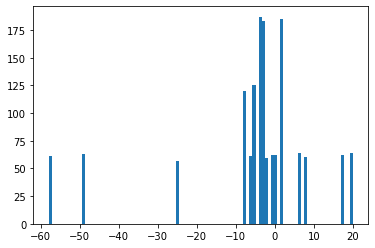

In [49]:
# 0값 -> -1값으로 변경결정
plt.hist(df_ct3['영업이익(억원)'], bins=100)

In [50]:
zeros = np.where(df_ct3['영업이익(억원)'] == 0)
zeros

(array([792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804,
        805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817,
        818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830,
        831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843,
        844, 845, 846, 847, 848, 849, 850, 851, 852, 853], dtype=int64),)

In [51]:
for idx in zeros:
    df_ct3['영업이익(억원)'].iloc[idx]= -1 

C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [52]:
np.where(df_ct3['영업이익(억원)'] == 0)

(array([], dtype=int64),)

### 캔들차트 0값변경

(array([727., 281., 130., 103.,  57.,  41.,  39.,  26.,  14.,   3.,  13.,
          9.,   2.,   3.,   1.,   2.,   2.,   1.,   2.,   2.,   2.,   1.,
          1.,   0.,   5.,   0.,   2.,   0.,   0.,   1.,   2.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0. ,   28.2,   56.4,   84.6,  112.8,  141. ,  169.2,  197.4,
         225.6,  253.8,  282. ,  310.2,  338.4,  366.6,  394.8,  423. ,
         451.2,  479.4,  507.6,  535.8,  564. ,  592.2,  620.4,  648.6,
         676.8,  705. ,  733.2,  761.4,  789.6,  817.8,  846. ,  874.2,
         902.4,  930.6,  958.8,  987. , 1015.2, 1043.4, 1071.6, 1099.8,
        1128. , 1156.2, 1184.4, 1212.6, 1240.8, 1269. , 1297.2, 1325.4,
        1353.6, 1381.8, 1410. ]),
 <BarContainer object of 50 artists>)

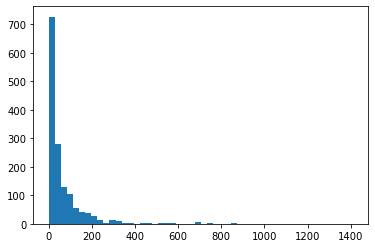

In [53]:
# 0값 -> -1값으로 변경결정
plt.hist(df_ct3['고가-시가'], bins=50)

In [54]:
candle = ['고가-종가','고가-시가','고가-저가', '종가-시가','종가-저가','시가-저가']

In [55]:
for can in candle:
    idxs = np.where(df_ct3[can] == 0)
    for idx in idxs:
        df_ct3[can].iloc[idx]= 1    

C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### 변동률 적용하기

In [56]:
df_ct3.isnull().sum()

일자             0
종가             0
등락률            0
거래대금           0
매출액(억원)        0
영업이익(억원)       0
당기순이익(억원)      0
지배주주순이익(억원)    0
자산총계(억원)       0
부채총계(억원)       0
자본총계(억원)       0
자본금(억원)        0
부채비율(%)        0
영업이익률(%)       0
지배주주순이익률(%)    0
ROA(%)         0
ROE(%)         0
EPS(원)         0
BPS(원)         0
PBR(배)         0
고가-종가          0
고가-시가          0
고가-저가          0
종가-시가          0
종가-저가          0
시가-저가          0
전환사채전환총액       0
dtype: int64

In [57]:
df_ct3.columns

Index(['일자', '종가', '등락률', '거래대금', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)',
       '지배주주순이익(억원)', '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)', '부채비율(%)',
       '영업이익률(%)', '지배주주순이익률(%)', 'ROA(%)', 'ROE(%)', 'EPS(원)', 'BPS(원)',
       'PBR(배)', '고가-종가', '고가-시가', '고가-저가', '종가-시가', '종가-저가', '시가-저가',
       '전환사채전환총액'],
      dtype='object')

In [58]:
#  '거래대금', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)',
#        '지배주주순이익(억원)', '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)'
df_ct3.iloc[:,3:12] = df_ct3.iloc[:,3:12].pct_change()

# EPS(원),BPS(원)
df_ct3.iloc[:,-10:-8] = df_ct3.iloc[:,-10:-8].pct_change()

# 고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
df_ct3.iloc[:,-7:] = df_ct3.iloc[:,-7:].pct_change()

In [59]:
df_ct3

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,3020,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,3020,0.00,-0.452066,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.913043,-0.176471,-0.200000,-3.000000,8.000000,-0.250000,0.0
2,2016-01-06,2895,-4.14,0.292444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,16.000000,-0.071429,1.250000,-2.750000,-0.388889,4.333333,0.0
3,2016-01-07,2945,1.73,0.843234,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.088235,2.615385,0.155556,-1.761905,0.909091,-0.843750,0.0
4,2016-01-08,2920,-0.85,-0.546023,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.870968,-0.829787,-0.288462,-0.750000,0.571429,4.800000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,871,0.93,-0.676301,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.65,-0.742424,-0.712644,-0.580645,-0.619048,-0.185185,1.333333,0.0
1471,2021-12-27,800,-8.15,0.997646,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.65,0.058824,-0.960000,-0.025641,-3.250000,-0.090909,1.714286,0.0
1472,2021-12-28,801,0.13,-0.792877,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.65,-0.500000,9.000000,-0.473684,-1.055556,-0.450000,-0.736842,0.0
1473,2021-12-29,840,4.87,1.293926,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.65,-0.111111,4.400000,1.700000,45.000000,3.181818,-0.900000,0.0


In [60]:
df_ct3 = df_ct3.drop(index=0)

In [61]:
fix_col = ['거래대금', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)','지배주주순이익(억원)', \
           '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)','EPS(원)','BPS(원)',\
          '고가-종가', '고가-시가', '고가-저가', '종가-시가', '종가-저가', '시가-저가',\
       '전환사채전환총액']

In [62]:
# 변동률 0값을 Nan값으로 바꾸고 앞의값으로 채워주기
for col in fix_col:
    df_ct3.loc[:,col] = df_ct3.loc[:,col].apply(lambda x: np.NaN if x==0 else x)
    df_ct3.loc[:,col] = df_ct3.loc[:,col].fillna(method= 'ffill')
    df_ct3.loc[:,col] = df_ct3.loc[:,col].fillna(method= 'bfill')
    

In [63]:
df_ct3

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,2016-01-05,3020,0.00,-0.452066,-0.229885,0.666667,4.500000,4.500000,-0.022624,-0.283582,...,3.357143,0.006270,1.88,-0.913043,-0.176471,-0.200000,-3.000000,8.000000,-0.250000,-0.800000
2,2016-01-06,2895,-4.14,0.292444,-0.229885,0.666667,4.500000,4.500000,-0.022624,-0.283582,...,3.357143,0.006270,1.88,16.000000,-0.071429,1.250000,-2.750000,-0.388889,4.333333,-0.800000
3,2016-01-07,2945,1.73,0.843234,-0.229885,0.666667,4.500000,4.500000,-0.022624,-0.283582,...,3.357143,0.006270,1.88,-0.088235,2.615385,0.155556,-1.761905,0.909091,-0.843750,-0.800000
4,2016-01-08,2920,-0.85,-0.546023,-0.229885,0.666667,4.500000,4.500000,-0.022624,-0.283582,...,3.357143,0.006270,1.88,-0.870968,-0.829787,-0.288462,-0.750000,0.571429,4.800000,-0.800000
5,2016-01-11,2810,-3.77,-0.349444,-0.229885,0.666667,4.500000,4.500000,-0.022624,-0.283582,...,3.357143,0.006270,1.88,5.250000,-0.375000,-0.270270,-6.000000,-0.939394,-0.241379,-0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,871,0.93,-0.676301,-2.800000,11.250000,-2.916667,-3.266667,-0.646305,-0.709798,...,-3.058824,0.148889,1.65,-0.742424,-0.712644,-0.580645,-0.619048,-0.185185,1.333333,-0.910293
1471,2021-12-27,800,-8.15,0.997646,-2.800000,11.250000,-2.916667,-3.266667,-0.646305,-0.709798,...,-3.058824,0.148889,1.65,0.058824,-0.960000,-0.025641,-3.250000,-0.090909,1.714286,-0.910293
1472,2021-12-28,801,0.13,-0.792877,-2.800000,11.250000,-2.916667,-3.266667,-0.646305,-0.709798,...,-3.058824,0.148889,1.65,-0.500000,9.000000,-0.473684,-1.055556,-0.450000,-0.736842,-0.910293
1473,2021-12-29,840,4.87,1.293926,-2.800000,11.250000,-2.916667,-3.266667,-0.646305,-0.709798,...,-3.058824,0.148889,1.65,-0.111111,4.400000,1.700000,45.000000,3.181818,-0.900000,-0.910293


In [64]:
df_ct3[df_ct3['영업이익(억원)'].isnull()]

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액


In [65]:
df_ct3['매출액(억원)'].value_counts()

 0.012270    126
-0.229885    120
 0.076923     64
 0.014235     64
-0.004032     63
-2.800000     63
 0.361702     63
 0.333333     62
 0.402985     62
 2.936508     62
 0.008097     62
 0.165975     62
-0.483871     61
-0.479167     61
-0.071429     61
-0.032129     61
-0.015625     61
-2.533333     61
 1.250000     60
-1.745995     59
-0.370000     59
-0.015873     57
Name: 매출액(억원), dtype: int64

In [67]:
df_ct3.to_csv('./data/시티랩스_모델데이터1.csv')

# 시티랩스 모델구축

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D

In [69]:
df_ct3 = pd.read_csv('./data/시티랩스_모델데이터1.csv',index_col=0)
df_ct3.head()

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,2016-01-05,3020,0.00,-0.452066,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,-0.913043,-0.176471,-0.200000,-3.000000,8.000000,-0.250000,-0.8
2,2016-01-06,2895,-4.14,0.292444,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,16.000000,-0.071429,1.250000,-2.750000,-0.388889,4.333333,-0.8
3,2016-01-07,2945,1.73,0.843234,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,-0.088235,2.615385,0.155556,-1.761905,0.909091,-0.843750,-0.8
4,2016-01-08,2920,-0.85,-0.546023,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,-0.870968,-0.829787,-0.288462,-0.750000,0.571429,4.800000,-0.8
5,2016-01-11,2810,-3.77,-0.349444,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,5.250000,-0.375000,-0.270270,-6.000000,-0.939394,-0.241379,-0.8


In [70]:
## 추가전처리
(df_ct3==np.inf).sum()

일자             0
종가             0
등락률            0
거래대금           4
매출액(억원)        0
영업이익(억원)       0
당기순이익(억원)      0
지배주주순이익(억원)    0
자산총계(억원)       0
부채총계(억원)       0
자본총계(억원)       0
자본금(억원)        0
부채비율(%)        0
영업이익률(%)       0
지배주주순이익률(%)    0
ROA(%)         0
ROE(%)         0
EPS(원)         0
BPS(원)         0
PBR(배)         0
고가-종가          0
고가-시가          0
고가-저가          0
종가-시가          0
종가-저가          0
시가-저가          0
전환사채전환총액       0
dtype: int64

In [71]:
df_ct4 = df_ct3[df_ct3['거래대금']!=np.inf]

## 연습

In [106]:
# window_size = 30

# X = []

# # 일자 종가 등략률 제외: 3번째 열~

# for i in range(len(df_ct3) - window_size): 
#     X.append([df_ct3.iloc[i+j,3:] for j in range(window_size)]) # j= 0부터 29 -> 30일치 데이터
     

In [9]:
# target_period = 10
# Y = []

# # 등락률 (index=1)
# for i in range(len(df_ct3) - window_size): 
#     Y.append([df_ct3.iloc[i+j,2] for j in range(target_period)])

In [10]:
# Y[0]

[0.67, 0.0, -4.14, 1.73, -0.85, -3.77, 2.67, 0.52, 4.66, -0.16]

In [11]:
# Y1 = []
# for y in Y:
#     toggle = 0
#     for i in y:

#         if i >= 10:
#             Y1.append(1)
#             toggle = 1
#             break
#     if toggle != 1:
#         Y1.append(0)

# Y1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,


In [ ]:
# print(Y1.count(0))
# print(Y1.count(1))

## X,Y값 설정

In [72]:
df_ct4.head(2)

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,2016-01-05,3020,0.00,-0.452066,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,-0.913043,-0.176471,-0.20,-3.00,8.000000,-0.250000,-0.8
2,2016-01-06,2895,-4.14,0.292444,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,16.000000,-0.071429,1.25,-2.75,-0.388889,4.333333,-0.8


In [96]:
window_size = 10
target_period = 10

X = []
Y = []


for i in range(len(df_ct4) - window_size-target_period): 
    
    # 피쳐값 
    X.append([df_ct4.iloc[i+j,3:] for j in range(window_size)]) # j= 0부터 29 -> 30일치 데이터

    # 등락률 
    Y.append([df_ct4.iloc[window_size+i+j,2] for j in range(target_period)])
    
Y1 = []
for y in Y:
    toggle = 0
    for i in y:

        if i >= 7:
            Y1.append(1)
            toggle = 1
            break
    if toggle != 1:
        Y1.append(0)


In [97]:
X_ary = np.array(X).astype(float)
Y1_ary = np.array(Y1).astype(float)

In [98]:
X_ary.shape

(1450, 10, 24)

In [99]:
Y1_ary.shape

(1450,)

In [130]:
1444/5

288.8

In [100]:
train_test_split = 1100

x_train = X_ary[:1100]
y_train = Y1_ary[:1100]

x_test = X_ary[1100:]
y_test = Y1_ary[1100:]

## 모델구축

In [101]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(LSTM(100, input_shape=(10,24)))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               50000     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 50,101
Trainable params: 50,101
Non-trainable params: 0
_________________________________________________________________


In [102]:
# learning rate 설정
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [103]:
model.compile(loss='binary_crossentropy', metrics ='accuracy', optimizer=Adam)

In [104]:
hist = model.fit(x_train, y_train, epochs=50, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/50
110/110 [==============================] - 2s 7ms/step - loss: 0.8165 - accuracy: 0.4436 - val_loss: 0.6689 - val_accuracy: 0.5714
Epoch 2/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5800 - accuracy: 0.6982 - val_loss: 0.5784 - val_accuracy: 0.6886
Epoch 3/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5400 - accuracy: 0.7236 - val_loss: 0.5660 - val_accuracy: 0.7143
Epoch 4/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5205 - accuracy: 0.7409 - val_loss: 0.5620 - val_accuracy: 0.7257
Epoch 5/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5052 - accuracy: 0.7418 - val_loss: 0.5665 - val_accuracy: 0.7229
Epoch 6/50
110/110 [==============================] - 1s 5ms/step - loss: 0.4938 - accuracy: 0.7536 - val_loss: 0.5638 - val_accuracy: 0.7229
Epoch 7/50
110/110 [==============================] - 1s 5ms/step - loss: 0.4809 - accuracy: 0.7591 - val_loss: 0.5676 - val_accuracy: 0.7200
Epoch 

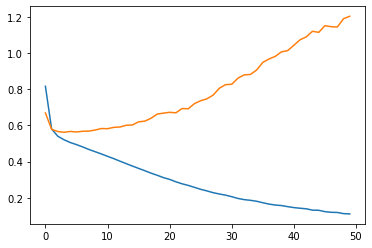

In [105]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

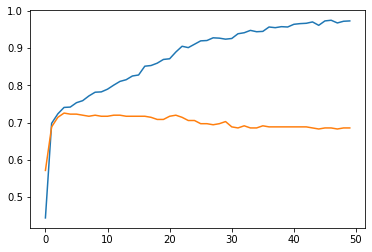

In [106]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [107]:
model.evaluate(x_test,y_test)

11/11 [==============================] - 0s 4ms/step - loss: 1.2043 - accuracy: 0.6857


[1.2042560577392578, 0.6857143044471741]